# Thyroid

In [1]:
# loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', 26)
from sklearn.utils import resample

In [2]:
data= pd.read_csv('thyroid_data.csv')
data.head()


,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,...,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,f,f,f,...,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,f,f,f,...,f,f,t,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,f,f,f,...,f,f,t,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,f,f,f,...,f,f,t,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,f,f,f,...,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,negative


In [3]:
data.shape

(3221, 28)

In [4]:
#There are total 3221 samples and 28 features

In [5]:
# There are 4 categories so it's a multiclass classification

In [6]:
#number of values in each category
n = len(data[data['Category'] == 'hyperthyroid'])
print("No of hyperthyroid in Dataset:",n)

n1 = len(data[data['Category'] == 'hypothyroid'])
print("No of hypothyroid in Dataset:",n1)

n2 = len(data[data['Category'] == 'sick'])
print("No of sick in Dataset:",n2)

n3 = len(data[data['Category'] == 'negative'])
print("No of negative in Dataset:",n3)

No of hyperthyroid in Dataset: 77
No of hypothyroid in Dataset: 220
No of sick in Dataset: 171
No of negative in Dataset: 2753


In [7]:
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [8]:
## Checking the missing values
data.isnull().sum()

S.no                         0
Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

In [9]:
#number of unique values in each feature
#if a feature has less than 10 unique values,print them
for cols in data.columns:
    unique_vals = data[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  S.no  has  2753  unique values
Feature  Age  has  94  unique values
Feature  Sex  has  3  unique values ---->  ['F' 'M' '?']
Feature  On Thyroxine  has  2  unique values ---->  ['f' 't']
Feature  Query on Thyroxine  has  2  unique values ---->  ['f' 't']
Feature  On Antithyroid Medication  has  2  unique values ---->  ['f' 't']
Feature  Sick  has  2  unique values ---->  ['f' 't']
Feature  Pregnant  has  2  unique values ---->  ['f' 't']
Feature  Thyroid Surgery  has  2  unique values ---->  ['f' 't']
Feature  I131 Treatment  has  2  unique values ---->  ['f' 't']
Feature  Query Hypothyroid  has  2  unique values ---->  ['f' 't']
Feature  Query Hyperthyroid  has  2  unique values ---->  ['f' 't']
Feature  Lithium  has  2  unique values ---->  ['f' 't']
Feature  Goitre  has  2  unique values ---->  ['f' 't']
Feature  Tumor  has  2  unique values ---->  ['f' 't']
Feature  Hypopituitary  has  2  unique values ---->  ['f' 't']
Feature  Psych  has  2  unique values ---->  ['f' 't']

# We can see that there are no missing values. But if we see the dataset the missing values are replaced with the invalid values like '?'. Let's replace such values with 'nan' and check for the missing values again.

In [10]:
#counting the appearance of ? in each feature
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

Age 1
Sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [11]:
## Let's drop some unnecessary columns
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured', 
       'FTI Measured'],axis=1)

In [12]:
## Now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [13]:
#Again counting the appearance of ? in each feature
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

Age 0
Sex 0
Sick 0
Pregnant 0
Thyroid Surgery 0
Goitre 0
Tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


# So, we have replaced all such values with 'nan' values.

In [14]:
##printing the unique Values in each feature
for column in data.columns:
    print(column,(data[column].unique()))

Age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
Sex ['F' 'M' nan]
Sick ['f' 't']
Pregnant ['f' 't']
Thyroid Surgery ['f' 't']
Goitre ['f' 't']
Tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [15]:
#checking the data types of each feature
data.dtypes

Age                object
Sex                object
Sick               object
Pregnant           object
Thyroid Surgery    object
Goitre             object
Tumor              object
TSH                object
T3                 object
TT4                object
T4U                object
FTI                object
Category           object
dtype: object

# Handling Missing Values

In [16]:
#handling the missing values in continuous variables by replacing them with their median values

In [17]:
data['Age'].fillna((data['Age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

# Handling nominal categorical variables

In [18]:
## We will perform one hot encoding for nominal categorical variable.
sex = data[["Sex"]]
sex = pd.get_dummies(sex, drop_first= True)

In [19]:
sick = data[["Sick"]]
sick = pd.get_dummies(sick, drop_first= True)

In [20]:
pregnant = data[["Pregnant"]]
pregnant = pd.get_dummies(pregnant, drop_first= True)

In [21]:
thyroid_surgery = data[["Thyroid Surgery"]]
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)

In [22]:
goitre = data[["Goitre"]]
goitre = pd.get_dummies(goitre, drop_first= True)

In [23]:
tumor = data[["Tumor"]]
tumor = pd.get_dummies(tumor, drop_first= True)

In [24]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [25]:
#concating the columns on which we have performed one hot encoding with the dataframe
final_df = pd.concat([data,sex, sick, pregnant, thyroid_surgery,
       goitre, tumor,], axis = 1)

In [26]:
final_df.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category', 'Sex_M', 'Sick_t',
       'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

In [27]:
#now that we have duplicate colimns of those features that were one hot encoded so we will drop the earlier ones
final_df.drop(['Sex', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'Goitre', 'Tumor'], axis = 1, inplace = True)

In [28]:
## Checking the missing values
final_df.isnull().sum()

Age                  0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
Category             0
Sex_M                0
Sick_t               0
Pregnant_t           0
Thyroid Surgery_t    0
Goitre_t             0
Tumor_t              0
dtype: int64

# Now the data has no missing values.

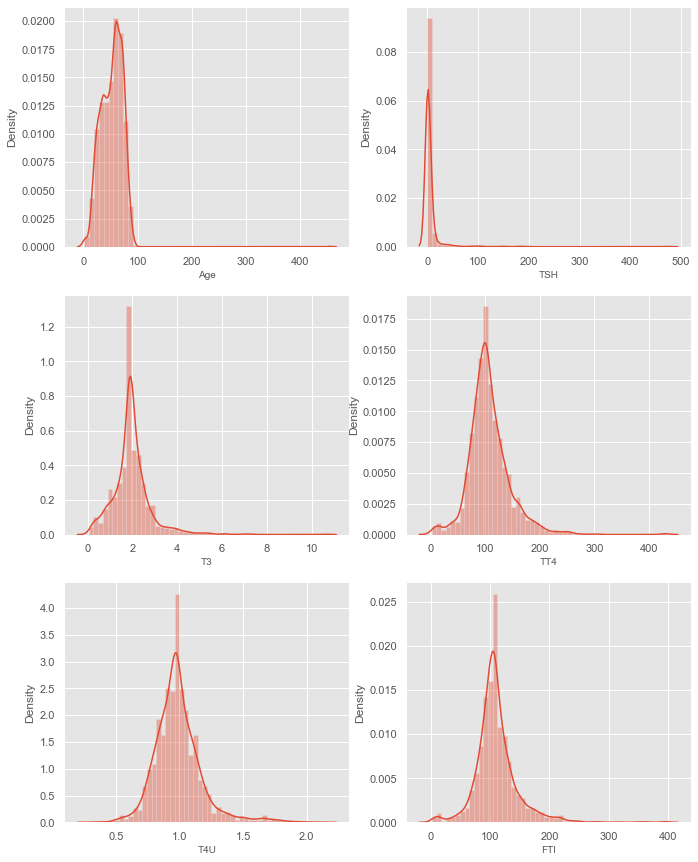

In [29]:
## Let's check the distribution for our continuous data in the dataset.
columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(final_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# The graph TSH heavyly skewed towards left.So, we will drop it.

In [30]:
final_df = final_df.drop(['TSH'], axis = 1)

In [31]:
#converting categorical variables into numeric variables
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
final_df['Category']=lblEn.fit_transform(final_df['Category'])

<AxesSubplot:xlabel='Category', ylabel='count'>

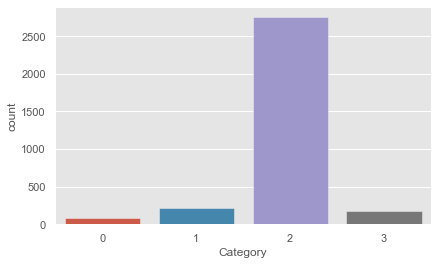

In [32]:
sns.countplot(final_df['Category'])

# We can see that the dataset is highly imbalanced.

In [33]:
#separating independemt and dependent variables
X=final_df.drop(['Category'],axis=1)
Y=final_df.Category

In [34]:
#Holdout validation approach

In [35]:
#giving 70% to train set and 30% to test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


In [36]:
#Stratified Train Test Split

In [37]:
#giving 70% to train set and 30% to test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.30, random_state = 0, stratify = Y)


In [38]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info


array([0.00950281, 0.11460709, 0.06383246, 0.02081555, 0.06631294,
       0.00744297, 0.00904592, 0.        , 0.00015638, 0.        ,
       0.00388684])

In [39]:
print(len(mutual_info))
print(X_train.shape)

11
(2254, 11)


In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

T3                   0.114607
FTI                  0.066313
TT4                  0.063832
T4U                  0.020816
Age                  0.009503
Sick_t               0.009046
Sex_M                0.007443
Tumor_t              0.003887
Thyroid Surgery_t    0.000156
Pregnant_t           0.000000
Goitre_t             0.000000
dtype: float64

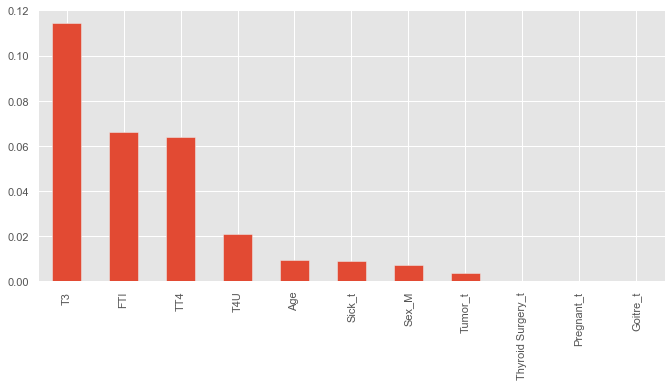

In [41]:
plt.figure(figsize = (10, 5))
mutual_info.sort_values(ascending = False).plot.bar();

# Model Creation and Evaluation

In [38]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [39]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8593611357586513
Test Accuracy:  0.843846949327818


In [40]:
ac_zero1 = accuracy_score(y_pred_test, y_test)

In [41]:
ac_zero1

0.843846949327818

In [42]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[  0   0  26   0]
 [  0   0  64   0]
 [  0   0 816   0]
 [  0   0  61   0]]

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.000     0.000     0.000        64
           2      0.844     1.000     0.915       816
           3      0.000     0.000     0.000        61

    accuracy                          0.844       967
   macro avg      0.211     0.250     0.229       967
weighted avg      0.712     0.844     0.772       967



# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
Y_pred=dt.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
ac_dt1=accuracy_score(y_test,Y_pred)

In [48]:
ac_dt1

0.6907962771458118

Depth =  2 , Training Accuracy =  0.8593611357586513 , Test Accuracy =  0.843846949327818 , Diff =  1.5514186430833243  %
Depth =  3 , Training Accuracy =  0.860248447204969 , Test Accuracy =  0.8417786970010341 , Diff =  1.846975020393482  %
Depth =  4 , Training Accuracy =  0.860248447204969 , Test Accuracy =  0.8417786970010341 , Diff =  1.846975020393482  %
Depth =  5 , Training Accuracy =  0.8642413487133984 , Test Accuracy =  0.8252326783867632 , Diff =  3.900867032663524  %
Depth =  6 , Training Accuracy =  0.8695652173913043 , Test Accuracy =  0.81282316442606 , Diff =  5.674205296524438  %
Depth =  7 , Training Accuracy =  0.8731144631765749 , Test Accuracy =  0.8024819027921406 , Diff =  7.063256038443432  %
Depth =  8 , Training Accuracy =  0.8762200532386868 , Test Accuracy =  0.795243019648397 , Diff =  8.097703359028973  %
Depth =  9 , Training Accuracy =  0.883318544809228 , Test Accuracy =  0.7745604963805585 , Diff =  10.875804842866954  %
Depth =  10 , Training Accura

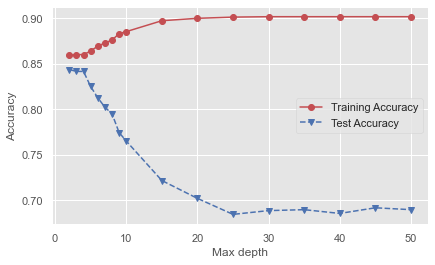

In [49]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [50]:
# create a model 
dt2 = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [51]:
Y_predt1=dt2.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
ac_dt2=accuracy_score(y_test,Y_predt1)

In [54]:
ac_dt2

0.843846949327818

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
Y_pred_knn=knn.predict(X_test)

In [58]:
ac_knn1=accuracy_score(y_test,Y_pred_knn)

In [59]:
ac_knn1

0.8107549120992761

K =  1 , Training Accuracy =  0.9019520851818988  Test Accuracy =  0.687693898655636 , Difference =  21.425818652626283 %
K =  5 , Training Accuracy =  0.8633540372670807  Test Accuracy =  0.8107549120992761 , Difference =  5.259912516780463 %
K =  10 , Training Accuracy =  0.8598047914818101  Test Accuracy =  0.8376421923474664 , Difference =  2.216259913434371 %
K =  15 , Training Accuracy =  0.8593611357586513  Test Accuracy =  0.8407445708376422 , Difference =  1.861656492100905 %
K =  20 , Training Accuracy =  0.8584738243123337  Test Accuracy =  0.8448810754912099 , Difference =  1.3592748821123712 %
K =  25 , Training Accuracy =  0.8589174800354925  Test Accuracy =  0.8428128231644261 , Difference =  1.6104656871066436 %
K =  30 , Training Accuracy =  0.8589174800354925  Test Accuracy =  0.843846949327818 , Difference =  1.50705307076745 %
K =  60 , Training Accuracy =  0.8593611357586513  Test Accuracy =  0.843846949327818 , Difference =  1.5514186430833243 %
K =  100 , Trainin

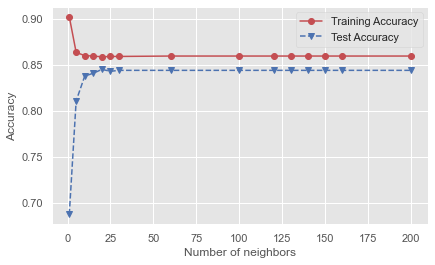

In [60]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  0.9019520851818988  Test Accuracy =  0.6918304033092038 , Difference =  21.01216818726951 %
K =  5 , Training Accuracy =  0.8642413487133984  Test Accuracy =  0.81282316442606 , Difference =  5.141818428733846 %
K =  10 , Training Accuracy =  0.8593611357586513  Test Accuracy =  0.8366080661840745 , Difference =  2.275306957457679 %
K =  15 , Training Accuracy =  0.8598047914818101  Test Accuracy =  0.8407445708376422 , Difference =  1.9060220644167902 %
K =  20 , Training Accuracy =  0.8593611357586513  Test Accuracy =  0.843846949327818 , Difference =  1.5514186430833243 %
K =  25 , Training Accuracy =  0.8593611357586513  Test Accuracy =  0.8428128231644261 , Difference =  1.6548312594225179 %
K =  30 , Training Accuracy =  0.8593611357586513  Test Accuracy =  0.843846949327818 , Difference =  1.5514186430833243 %
K =  40 , Training Accuracy =  0.8593611357586513  Test Accuracy =  0.843846949327818 , Difference =  1.5514186430833243 %
K =  50 , Training

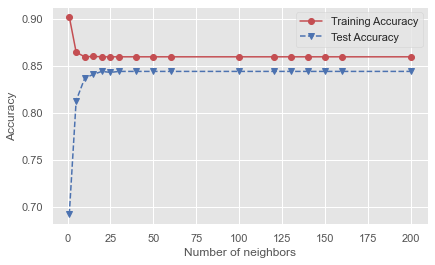

In [61]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [62]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y_test)

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.8566992014196984
Test Accuracy:  0.8376421923474664

Logistic Regression with L2 regularization
Train Accuracy:  0.8566992014196984
Test Accuracy:  0.8407445708376422


In [63]:
ac_lr1

0.8376421923474664

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
Y_pred_rf=rf.predict(X_test)

In [67]:
ac_rf1=accuracy_score(y_test,Y_pred_rf)

In [68]:
ac_rf1

0.7394002068252327

In [69]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8558118899733806
Test Accuracy:  0.8417786970010341


In [70]:
ac_perceptron1 = accuracy_score(y_pred_test, y_test)

In [71]:
ac_perceptron1

0.8417786970010341

In [72]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.5323868677905945
Test Accuracy:  0.5491209927611168


In [73]:
ac_naive1 = accuracy_score(y_pred_test, y_test)

In [74]:
ac_naive1

0.5491209927611168

In [75]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


Train Accuracy:  0.8815439219165927
Test Accuracy:  0.7921406411582212


In [76]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[  0   0  26   0]
 [  0   0  64   0]
 [  9  28 766  13]
 [  1   1  59   0]]

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.000     0.000     0.000        64
           2      0.837     0.939     0.885       816
           3      0.000     0.000     0.000        61

    accuracy                          0.792       967
   macro avg      0.209     0.235     0.221       967
weighted avg      0.706     0.792     0.747       967



In [77]:
ac_svc1 = accuracy_score(y_pred_test, y_test)

In [78]:
ac_svc1

0.7921406411582212

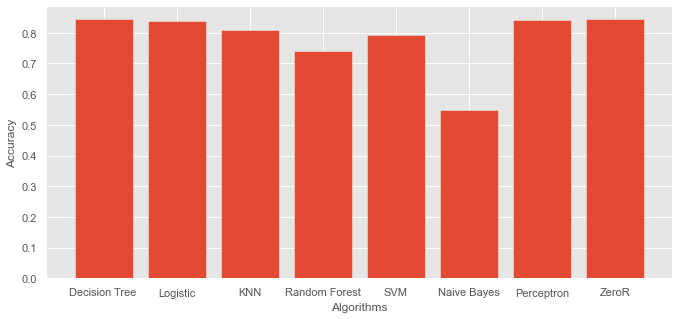

In [79]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],
        [ac_dt2,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [80]:
#Manual

In [81]:
dt=DecisionTreeClassifier(max_depth=3,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [82]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

84.17786970010341

In [83]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.860
Accuracy on test set: 0.842


In [84]:
accuracy_score(prediction,y_test)

0.8417786970010341

In [85]:
#now let's try to do hyperparameter

In [86]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [87]:
#let's try with Randomized Search Cv

In [88]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [89]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [90]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1,
 'criterion': 'gini'}

In [91]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=1, max_features='log2', min_samples_split=5,
                       splitter='random')

In [92]:
best_random_grid=rf_randomcv.best_estimator_

In [93]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.843846949327818


In [94]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [95]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0  26   0]
 [  0   0  64   0]
 [  0   0 816   0]
 [  0   0  61   0]]
0.843846949327818
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        64
           2       0.84      1.00      0.92       816
           3       0.00      0.00      0.00        61

    accuracy                           0.84       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.71      0.84      0.77       967



In [96]:
#GridSearch CV 

In [97]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1,
 'criterion': 'gini'}

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [7, 6, 5, 8, 9], 'splitter': ['random']}


In [99]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [7, 6, 5, 8, 9],
                         'splitter': ['random']},
             verbose=2)

In [100]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1, max_features='log2', min_samples_split=7,
                       splitter='random')

In [101]:
best_grid=grid_search.best_estimator_

In [102]:
best_grid

DecisionTreeClassifier(max_depth=1, max_features='log2', min_samples_split=7,
                       splitter='random')

In [103]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[  0   0  26   0]
 [  0   0  64   0]
 [  0   0 816   0]
 [  0   0  61   0]]
Accuracy Score 0.843846949327818
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        64
           2       0.84      1.00      0.92       816
           3       0.00      0.00      0.00        61

    accuracy                           0.84       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.71      0.84      0.77       967



# KNN HPT

In [104]:
#Manual

In [105]:
knn=KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [106]:
pred1=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,pred1)*100
accuracy_knn

83.66080661840745

In [107]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.859
Accuracy on test set: 0.837


In [108]:
accuracy_score(pred1,y_test)

0.8366080661840745

In [109]:
#now let's try to do hyperparameter

In [110]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [111]:
#let's try with Randomized Search Cv

In [112]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [113]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [114]:
rf3_randomcv.best_params_

{'weights': 'uniform', 'n_neighbors': 152, 'metric': 'minkowski'}

In [115]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(n_neighbors=152)

In [116]:
best_random_grid1=rf3_randomcv.best_estimator_

In [117]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.843846949327818


In [118]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [119]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0  26   0]
 [  0   0  64   0]
 [  0   0 816   0]
 [  0   0  61   0]]
0.843846949327818
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        64
           2       0.84      1.00      0.92       816
           3       0.00      0.00      0.00        61

    accuracy                           0.84       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.71      0.84      0.77       967



In [120]:
#GridSearch CV 

In [121]:
rf3_randomcv.best_params_

{'weights': 'uniform', 'n_neighbors': 152, 'metric': 'minkowski'}

In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['uniform'], 'n_neighbors': [152, 154, 156, 150, 148], 'metric': ['minkowski']}


In [123]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [152, 154, 156, 150, 148],
                         'weights': ['uniform']},
             verbose=2)

In [124]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=152)

In [125]:
best_grid1=grid_search.best_estimator_

In [126]:
best_grid1

KNeighborsClassifier(n_neighbors=152)

In [127]:
y_pred4=best_grid1.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[  0   0  26   0]
 [  0   0  64   0]
 [  0   0 816   0]
 [  0   0  61   0]]
Accuracy Score 0.843846949327818
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        64
           2       0.84      1.00      0.92       816
           3       0.00      0.00      0.00        61

    accuracy                           0.84       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.71      0.84      0.77       967



# Logistic regression

In [128]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X_train, y_train)
y_pred_train = clf6.predict(X_train)
y_pred_test = clf6.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()



Logistic Regression with no regularization
Train Accuracy:  0.8566992014196984
Test Accuracy:  0.8376421923474664



In [129]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [130]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.858920 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.851813 (0.010918) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.853883 (0.010453) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.857878 (0.006312) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.851665 (0.010990) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.854326 (0.009952) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.857729 (0.006378) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.852701 (0.010091) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.853731 (0.009627) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.857731 (0.005677) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.855660 (0.009420) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856547 (0.007697) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.858328 (0.004198) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.854480 (0.009953) wi

In [131]:
grid_y_predicted = grid_result.predict(X1_test)


In [132]:
logis_grid_score=accuracy_score(y_test, grid_y_predicted)

In [133]:
logis_grid_score

0.8448810754912099

In [134]:
confusion_matrix(y_test, grid_y_predicted)

array([[  0,   0,  26,   0],
       [  0,   0,  64,   0],
       [  0,   0, 816,   0],
       [  0,   0,  60,   1]], dtype=int64)

In [135]:
print(classification_report(y_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        64
           2       0.84      1.00      0.92       816
           3       1.00      0.02      0.03        61

    accuracy                           0.84       967
   macro avg       0.46      0.25      0.24       967
weighted avg       0.78      0.84      0.77       967



In [136]:
#Accuracy did not improve much after hyper parameter tuning 

# With Stratified Train Test split

In [137]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [138]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.8544809228039042
Test Accuracy:  0.8552223371251293


In [139]:
ac_zero2 = accuracy_score(y_pred_test, y1_test)

In [140]:
ac_zero2

0.8552223371251293

In [141]:
#As there is class imbalance issue,we need classification report as well

In [142]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[  0   0  23   0]
 [  0   0  66   0]
 [  0   0 827   0]
 [  0   0  51   0]]

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.000     0.000     0.000        66
           2      0.855     1.000     0.922       827
           3      0.000     0.000     0.000        51

    accuracy                          0.855       967
   macro avg      0.214     0.250     0.230       967
weighted avg      0.731     0.855     0.788       967



# Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [144]:
dt.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [145]:
Y_pred=dt.predict(X1_test)

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
ac_dt4=accuracy_score(y1_test,Y_pred)

In [148]:
ac_dt4

0.6970010341261634

Depth =  2 , Training Accuracy =  0.8553682342502218 , Test Accuracy =  0.8510858324715616 , Diff =  0.42824017786602386  %
Depth =  3 , Training Accuracy =  0.8584738243123337 , Test Accuracy =  0.843846949327818 , Diff =  1.4626874984515648  %
Depth =  4 , Training Accuracy =  0.8593611357586513 , Test Accuracy =  0.8417786970010341 , Diff =  1.7582438757617114  %
Depth =  5 , Training Accuracy =  0.8606921029281278 , Test Accuracy =  0.8366080661840745 , Diff =  2.408403674405335  %
Depth =  6 , Training Accuracy =  0.8633540372670807 , Test Accuracy =  0.828335056876939 , Diff =  3.501898039014173  %
Depth =  7 , Training Accuracy =  0.8664596273291926 , Test Accuracy =  0.8221302998965874 , Diff =  4.432932743260521  %
Depth =  8 , Training Accuracy =  0.870452528837622 , Test Accuracy =  0.8086866597724922 , Diff =  6.176586906512982  %
Depth =  9 , Training Accuracy =  0.8757763975155279 , Test Accuracy =  0.7766287487073423 , Diff =  9.914764880818561  %
Depth =  10 , Training 

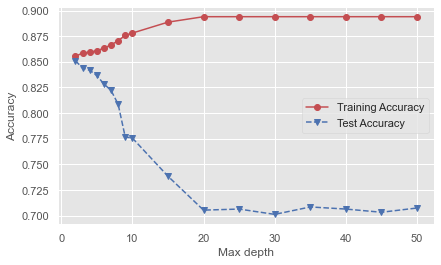

In [149]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc[index] = accuracy_score(y1_train, y_predTrain)
    testAcc[index] = accuracy_score(y1_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [150]:
# create a model 
dt5 = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt5.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [151]:
Y_predt1=dt5.predict(X1_test)

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
ac_dt2=accuracy_score(y1_test,Y_predt1)

In [154]:
ac_dt2

0.8510858324715616

# KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [156]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier()

In [157]:
Y_pred_knn=knn.predict(X1_test)

In [158]:
ac_knn1=accuracy_score(y1_test,Y_pred_knn)

In [159]:
ac_knn1

0.827300930713547

K =  1 , Training Accuracy =  0.8935226264418811  Test Accuracy =  0.6980351602895554 , Difference =  19.54874661523257 %
K =  5 , Training Accuracy =  0.8553682342502218  Test Accuracy =  0.827300930713547 , Difference =  2.806730353667475 %
K =  10 , Training Accuracy =  0.8553682342502218  Test Accuracy =  0.8448810754912099 , Difference =  1.048715875901185 %
K =  15 , Training Accuracy =  0.8540372670807453  Test Accuracy =  0.8521199586349535 , Difference =  0.19173084457918543 %
K =  20 , Training Accuracy =  0.8535936113575865  Test Accuracy =  0.8521199586349535 , Difference =  0.1473652722633001 %
K =  25 , Training Accuracy =  0.8527062999112689  Test Accuracy =  0.8541882109617374 , Difference =  0.14819110504684652 %
K =  30 , Training Accuracy =  0.8544809228039042  Test Accuracy =  0.8552223371251293 , Difference =  0.07414143212250979 %
K =  60 , Training Accuracy =  0.8544809228039042  Test Accuracy =  0.8552223371251293 , Difference =  0.07414143212250979 %
K =  100 ,

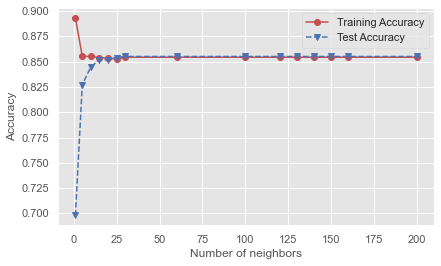

In [160]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  0.8935226264418811  Test Accuracy =  0.7021716649431231 , Difference =  19.135096149875796 %
K =  5 , Training Accuracy =  0.8558118899733806  Test Accuracy =  0.8293691830403309 , Difference =  2.644270693304973 %
K =  10 , Training Accuracy =  0.8531499556344276  Test Accuracy =  0.8448810754912099 , Difference =  0.8268880143217694 %
K =  15 , Training Accuracy =  0.8544809228039042  Test Accuracy =  0.8500517063081696 , Difference =  0.4429216495734578 %
K =  20 , Training Accuracy =  0.8544809228039042  Test Accuracy =  0.8510858324715616 , Difference =  0.3395090332342643 %
K =  25 , Training Accuracy =  0.854924578527063  Test Accuracy =  0.8510858324715616 , Difference =  0.38387460555014963 %
K =  30 , Training Accuracy =  0.8544809228039042  Test Accuracy =  0.8531540847983454 , Difference =  0.13268380055587725 %
K =  40 , Training Accuracy =  0.8544809228039042  Test Accuracy =  0.8541882109617374 , Difference =  0.029271184216683732 %
K =  50 

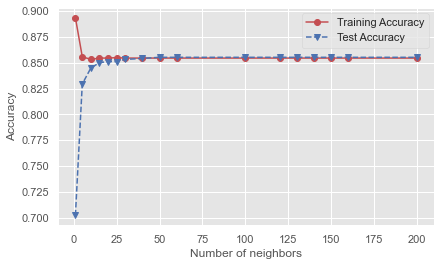

In [161]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [162]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty = 'none')

lr2.fit(X1_train, y1_train)
y_pred_train = lr2.predict(X1_train)
y_pred_test = lr2.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y1_test)

lr3 = LogisticRegression(penalty = 'l2')

lr3.fit(X1_train, y1_train)
y_pred_train = lr3.predict(X1_train)
y_pred_test = lr3.predict(X1_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Logistic Regression with no regularization
Train Accuracy:  0.8500443655723159
Test Accuracy:  0.8562564632885212

Logistic Regression with L2 regularization
Train Accuracy:  0.8491570541259982
Test Accuracy:  0.8583247156153051


In [163]:
ac_lr1

0.8562564632885212

# Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [165]:
rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [166]:
Y_pred_rf=rf.predict(X1_test)

In [167]:
ac_rf1=accuracy_score(y1_test,Y_pred_rf)

In [168]:
ac_rf1

0.7611168562564633

In [169]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.8402839396628217
Test Accuracy:  0.8541882109617374


In [170]:
ac_perceptron1 = accuracy_score(y_pred_test, y1_test)

In [171]:
ac_perceptron1

0.8541882109617374

In [172]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.5212954747116237
Test Accuracy:  0.5729058945191313


In [173]:
ac_naive1 = accuracy_score(y_pred_test, y1_test)

In [174]:
ac_naive1

0.5729058945191313

In [175]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))


Train Accuracy:  0.8753327417923691
Test Accuracy:  0.8066184074457083


In [176]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[  0   0  21   2]
 [  0   0  66   0]
 [ 12  19 780  16]
 [  1   0  50   0]]

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.000     0.000     0.000        66
           2      0.851     0.943     0.894       827
           3      0.000     0.000     0.000        51

    accuracy                          0.807       967
   macro avg      0.213     0.236     0.224       967
weighted avg      0.727     0.807     0.765       967



In [177]:
ac_svc1 = accuracy_score(y_pred_test, y1_test)

In [178]:
ac_svc1

0.8066184074457083

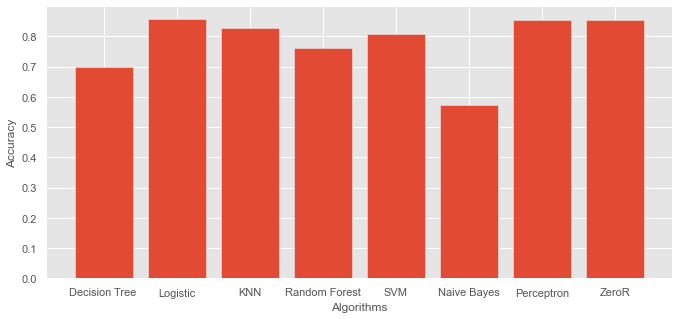

In [180]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],
        [ac_dt4,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero2])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [181]:
#Manual

In [182]:
dt=DecisionTreeClassifier(max_depth=2,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [183]:
prediction=dt.predict(X1_test)
accuracy_dt=accuracy_score(y1_test,prediction)*100
accuracy_dt

85.10858324715616

In [184]:
print("Accuracy on training set: {:.3f}".format(dt.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X1_test, y1_test)))

Accuracy on training set: 0.855
Accuracy on test set: 0.851


In [185]:
accuracy_score(prediction,y1_test)

0.8510858324715616

In [186]:
#now let's try to do hyperparameter

In [187]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [188]:
#let's try with Randomized Search Cv

In [189]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [190]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [191]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 445,
 'criterion': 'gini'}

In [192]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=445, max_features='log2', min_samples_leaf=6,
                       splitter='random')

In [193]:
best_random_grid=rf_randomcv.best_estimator_

In [194]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.843846949327818


In [195]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [196]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[  0   0  23   0]
 [  0   0  66   0]
 [  0   0 827   0]
 [  0   0  51   0]]
0.8552223371251293
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        66
           2       0.86      1.00      0.92       827
           3       0.00      0.00      0.00        51

    accuracy                           0.86       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.73      0.86      0.79       967



In [197]:
#GridSearch CV 

In [198]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 445,
 'criterion': 'gini'}

In [199]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [445], 'max_features': ['log2'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [4, 3, 2, 5, 6], 'splitter': ['random']}


In [200]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [445],
                         'max_features': ['log2'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [4, 3, 2, 5, 6],
                         'splitter': ['random']},
             verbose=2)

In [201]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=445, max_features='log2', min_samples_leaf=10,
                       min_samples_split=4, splitter='random')

In [202]:
best_grid=grid_search.best_estimator_

In [203]:
best_grid

DecisionTreeClassifier(max_depth=445, max_features='log2', min_samples_leaf=10,
                       min_samples_split=4, splitter='random')

In [204]:
y_pred=best_grid.predict(X1_test)
print(confusion_matrix(y1_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))
print("Classification report: {}".format(classification_report(y1_test,y_pred)))

[[  0   0  23   0]
 [  0   0  66   0]
 [  0   0 827   0]
 [  0   0  51   0]]
Accuracy Score 0.8552223371251293
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        66
           2       0.86      1.00      0.92       827
           3       0.00      0.00      0.00        51

    accuracy                           0.86       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.73      0.86      0.79       967



# KNN HPT

In [205]:
#Manual

In [206]:
knn=KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=1)
knn.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=100, p=1)

In [207]:
pred1=knn.predict(X1_test)
accuracy_knn=accuracy_score(y1_test,pred1)*100
accuracy_knn

85.52223371251293

In [208]:
print("Accuracy on training set: {:.3f}".format(knn.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X1_test, y1_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.855


In [209]:
accuracy_score(pred1,y1_test)

0.8552223371251293

In [210]:
#now let's try to do hyperparameter

In [211]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [212]:
#let's try with Randomized Search Cv

In [213]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [214]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [215]:
rf3_randomcv.best_params_

{'weights': 'uniform', 'n_neighbors': 152, 'metric': 'minkowski'}

In [218]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(n_neighbors=152)

In [219]:
best_random_grid1=rf3_randomcv.best_estimator_

In [220]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))


Accuracy Score 0.8552223371251293


In [221]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [222]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[  0   0  23   0]
 [  0   0  66   0]
 [  0   0 827   0]
 [  0   0  51   0]]
0.8552223371251293
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        66
           2       0.86      1.00      0.92       827
           3       0.00      0.00      0.00        51

    accuracy                           0.86       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.73      0.86      0.79       967



In [223]:
#GridSearch CV 

In [224]:
rf3_randomcv.best_params_

{'weights': 'uniform', 'n_neighbors': 152, 'metric': 'minkowski'}

In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['uniform'], 'n_neighbors': [152, 154, 156, 150, 148], 'metric': ['minkowski']}


In [226]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [152, 154, 156, 150, 148],
                         'weights': ['uniform']},
             verbose=2)

In [227]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=152)

In [228]:
best_grid1=grid_search.best_estimator_

In [229]:
best_grid1

KNeighborsClassifier(n_neighbors=152)

In [230]:
y_pred4=best_grid1.predict(X1_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[  0   0  26   0]
 [  0   0  64   0]
 [  0   0 816   0]
 [  0   0  61   0]]
Accuracy Score 0.843846949327818
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        64
           2       0.84      1.00      0.92       816
           3       0.00      0.00      0.00        61

    accuracy                           0.84       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.71      0.84      0.77       967



# Logistic regression

In [231]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X1_train, y1_train)
y_pred_train = clf6.predict(X1_train)
y_pred_test = clf6.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()



Logistic Regression with no regularization
Train Accuracy:  0.8500443655723159
Test Accuracy:  0.8562564632885212



In [232]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [233]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853594 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.847683 (0.013652) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.846350 (0.010421) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.851379 (0.007144) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.847386 (0.013823) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.848718 (0.008510) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.850935 (0.006753) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.847830 (0.013376) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.848715 (0.007592) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.850342 (0.005297) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.849167 (0.011672) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.849458 (0.009424) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.853153 (0.003895) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.850348 (0.009927) wi

In [234]:
grid_y_predicted = grid_result.predict(X1_test)


In [235]:
logis_grid_score=accuracy_score(y1_test, grid_y_predicted)

In [236]:
logis_grid_score

0.8541882109617374

In [237]:
confusion_matrix(y1_test, grid_y_predicted)

array([[  0,   0,  23,   0],
       [  0,   0,  66,   0],
       [  0,   0, 826,   1],
       [  0,   0,  51,   0]], dtype=int64)

In [238]:
print(classification_report(y1_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        66
           2       0.86      1.00      0.92       827
           3       0.00      0.00      0.00        51

    accuracy                           0.85       967
   macro avg       0.21      0.25      0.23       967
weighted avg       0.73      0.85      0.79       967



In [239]:
#Accuracy did not improve much after hyper parameter tuning 